In [1]:
# treshs = [3e-7, 3e-6, 1e-5, 1e-4]

In [2]:
import sys
sys.path.append('..')

from olfactory_navigation import Environment
from olfactory_navigation.agents.infotaxis_agent import Infotaxis_Agent
from olfactory_navigation.simulation import run_test
from olfactory_navigation.test_setups import run_all_starts_test


from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import cupy as cp

In [3]:
from cupy.cuda import runtime as cuda_runtime
cuda_runtime.setDevice(0)

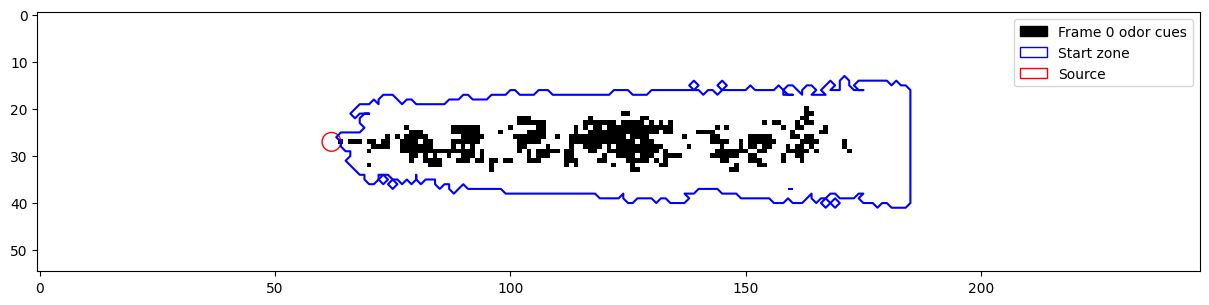

In [4]:
env = Environment(data="G:\\My Drive\\Documents\\Universita di Genova\Pimlb work\\nose_data_27_123.npy",
                  source_position=[13, 0],
                  source_radius=2,
                  margins=[14, 62],
                  boundary_condition='wrap_vertical',
                  start_zone='odor_present',
                  odor_present_treshold=3e-6)

env.plot()

In [5]:
ag = Infotaxis_Agent(env)

[04/29/2024, 15:11:25] Instantiation of MDP Model:
[04/29/2024, 15:11:25] - 13585 states
[04/29/2024, 15:11:25] - 4 actions
[04/29/2024, 15:11:25] - At most 1 reachable states per state-action pair
[04/29/2024, 15:11:25] - Starting generation of transitions table
[04/29/2024, 15:11:25]     > [Warning] No transition matrix or function provided but reachable states are, so probability to reach any reachable states will "1 / reachable state count" so here: 1.000.
[04/29/2024, 15:11:25]     > Done in 0.000s
[04/29/2024, 15:11:25] - Generation of state grid
[04/29/2024, 15:11:25] - Generating start probabilities table
[04/29/2024, 15:11:25] - Starting computation of reachable state probabilities from transition data
[04/29/2024, 15:11:25]     > Done in 0.000s

[04/29/2024, 15:11:25] POMDP particular parameters:
[04/29/2024, 15:11:25] - 3 observations
[04/29/2024, 15:11:25] - Starting of transitional observations for reachable states table
[04/29/2024, 15:11:25]     > Done in 0.001s
[04/29/2

In [6]:
hist = run_test(n=10, agent=ag, time_shift=100, horizon=1000, use_gpu=False)

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulations done in 3.558s:
Simulations reached goal: 10/10 (0 failures) (100.00%)
	- Average step count: 92.6 (Successfull only: 92.6)
	- Extra steps: 19.8 (Successful only: 19.8)
	- Average discounted rewards (ADR): 0.444 (Successfull only: 0.444) (discount: 0.99)
	- Tmin/T: 0.768 (Successful only: 0.768)


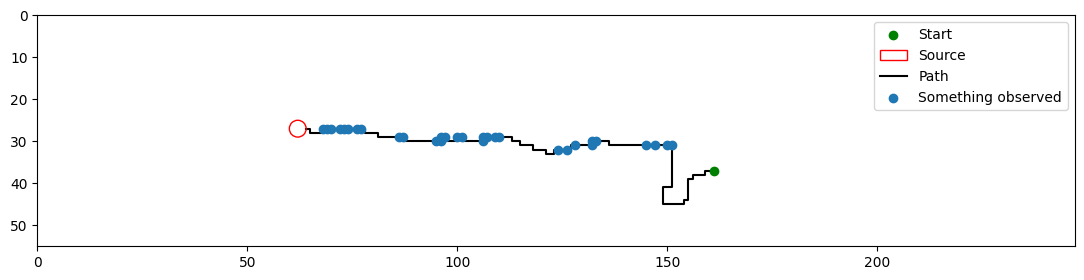

In [9]:
hist.plot(2)

In [10]:
hist = run_all_starts_test(ag)

  0%|          | 0/1000 [00:00<?, ?it/s]

c:\Users\arnau\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_entropy.py:133: RuntimeWarning: divide by zero encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
c:\Users\arnau\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_entropy.py:133: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


Simulations done in 1504.103s:
Simulations reached goal: 2371/2393 (22 failures) (99.08%)
	- Average step count: 98.25908900961137 (Successfull only: 89.8920286798819)
	- Extra steps: 27.225658169661514 (Successful only: 18.3880219316744)
	- Average discounted rewards (ADR): 0.440 (Successfull only: 0.444) (discount: 0.99)
	- Tmin/T: 0.795 (Successful only: 0.802)


In [11]:
hist.save()

Simulations saved to: ./Simulations-s_55_247-n_2393-04282024_223619-horizon_1000.csv


array([ 626,  736,  760, 1217, 1218, 1234, 1334, 1335, 1336, 1452, 1453,
       1454, 1570, 1571, 1572, 1573, 1590, 1689, 1690, 1691, 1807, 1808],
      dtype=int64)

In [16]:
hist.plot(736)

In [25]:
from olfactory_navigation.simulation import SimulationHistory


def plot_failures(history:SimulationHistory):
    failed_sims = np.argwhere(history.done_at_step < 0)[:,0]

    plt.imshow(np.zeros(history.environment.shape), cmap='Greys')

    failed_starts = history.start_state[failed_sims,:]

    plt.scatter(failed_starts[:,1], failed_starts[:,0], c='red')

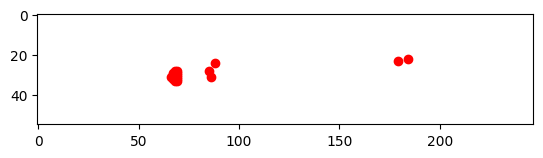

In [26]:
plot_failures(hist)

In [29]:
t = np.zeros(hist.environment.shape)
t[hist.start_state[:,0], hist.start_state[:,1]] = hist.done_at_step

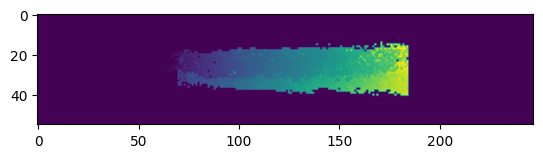

In [30]:
plt.imshow(t)